In [4]:
import numpy as np
import matplotlib.pyplot as plt
import json

import adaptivealgo.cli.policy_iter as pi

Finding policy for n_links=2 converged in 2 iterations
Finding policy for n_links=3 converged in 2 iterations
Finding policy for n_links=4 converged in 2 iterations
Finding policy for n_links=5 converged in 3 iterations


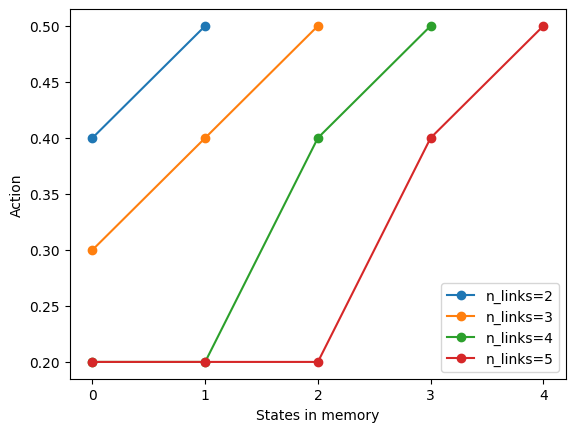

In [19]:
links = [2, 3, 4, 5]
f_thresh = 0.4
actions = [0.1, 0.2, 0.3, 0.4, 0.5]
alpha = 1.0
gamma = 0.2
tol = 1e-6

policies = {}
for n_links in links:
    policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
    policies[n_links] = policy["policy"]
    print(f"Finding policy for n_links={n_links} converged in {i} iterations")

mc_actions = {}

for n_links, policy in policies.items():
    mc_actions[n_links] = {}
    for state, action in policy.items():
        state_list = json.loads(state)
        state_length = len(state_list)
        if state_length not in mc_actions[n_links]:
            mc_actions[n_links][state_length] = []
        mc_actions[n_links][state_length].append(action)

for n_links, policy in mc_actions.items():
    for state_length, state_actions in policy.items():
        mc_action_idx = max(set(state_actions), key=state_actions.count)
        mc_actions[n_links][state_length] = actions[mc_action_idx]

for n_links, policy in mc_actions.items():
    x = list(policy.keys())
    y = list(policy.values())
    plt.plot(x, y, label=f"n_links={n_links}", marker='o')

plt.xlabel("States in memory")
plt.ylabel("Action")
plt.xticks(np.arange(0, max(mc_actions.keys()), 1))
plt.legend()
    